# Generating Data

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

Generating data for age and salary using random numbers them labeling the data by using a model of x = y line

In [2]:
age, sal, lab = [], [], []

for i in range(100):
    age.append(round(np.random.random()*100,2))
    sal.append(round(np.random.random()*100,2))

    if age[i] - sal[i] < 0 :
        lab.append("creditable")
    else:
        lab.append("non creditable")

print (age, sal, lab)

[48.65, 65.31, 6.03, 68.32, 1.81, 85.04, 19.12, 40.91, 2.2, 31.82, 8.7, 32.98, 94.4, 55.86, 35.69, 86.06, 43.49, 12.23, 16.86, 5.49, 87.89, 39.65, 12.76, 75.47, 94.42, 59.25, 77.44, 43.0, 74.87, 16.29, 52.71, 53.52, 13.86, 12.11, 35.53, 61.66, 70.62, 37.69, 72.32, 2.61, 51.26, 87.91, 9.94, 95.13, 87.72, 60.5, 88.5, 88.83, 16.22, 21.28, 34.23, 47.16, 73.71, 38.9, 13.61, 55.22, 61.4, 20.41, 24.31, 6.54, 48.82, 44.04, 73.81, 90.35, 42.88, 85.87, 2.32, 86.69, 27.09, 65.71, 79.27, 40.78, 60.26, 89.22, 84.8, 66.7, 46.75, 62.43, 4.38, 63.41, 99.49, 10.28, 85.8, 69.93, 98.83, 36.81, 9.48, 98.1, 52.13, 35.03, 6.62, 8.95, 80.95, 40.7, 24.58, 0.08, 15.53, 33.91, 47.46, 80.27] [16.1, 73.24, 93.26, 24.44, 0.11, 94.29, 70.8, 28.23, 47.12, 83.34, 96.31, 3.17, 10.17, 93.01, 18.42, 19.24, 60.76, 33.8, 11.54, 9.87, 44.43, 95.63, 86.66, 83.74, 36.24, 96.46, 7.36, 54.11, 85.53, 74.68, 30.02, 69.41, 50.16, 33.89, 41.26, 3.39, 97.16, 41.28, 97.53, 95.46, 19.74, 26.32, 58.58, 19.66, 27.06, 78.47, 76.05, 9.94

Object Customer is used to bind all the attributes of each customers list hist_data contails list of all those objects



In [0]:
class Customer(object):
    def __init__(self, age, sal, lab = None):
        self.age = age
        self.sal = sal
        self.lab = lab

    def distance(self, other):
        x = self.age - other.age
        y = self.sal - other.sal
        return (x**2 + y**2)**.5

    def __str__(self):
        return ("age -> " + str(self.age) + " sal -> " + str(self.sal) + " lable -> " + str(self.lab))

In [0]:
hist_data = []
for i in range(len(age)):
    hist_data.append(Customer(age[i], sal[i], lab[i]))

In [5]:
print(hist_data[2])

age -> 6.03 sal -> 93.26 lable -> creditable


# KNN

In [0]:
def k_nearest(data, person, k):
    """ assumes data is list of objects of type Customer 
    person is single Customer which is to be classified and 
    k is integer which is algoithm parameter, returns label for person"""
    data_loc = list(data)
    for i in range(len(data_loc)):
        data_loc[i].dist = person.distance(data_loc[i])
    data_sorted = sorted(data_loc, key = lambda e:e.dist)
    labels = {}
    for i in range(k):
        if data_sorted[i].lab in labels:
            labels[data_sorted[i].lab] += 1
        else:
            labels[data_sorted[i].lab] = 1
    for key in labels:
        if labels[key] > k/2:
            return key

In [7]:
k_nearest(hist_data, Customer(25, 65), 3)

'creditable'

# K-Fold Cross Validation


In [0]:
def n_foldValidation(data, k, n):
    data_loc = list(data)
    random.shuffle(data_loc)
    data_splits =[]
    for i in range(n):
        data_splits.append(data_loc[max(0, i*(len(data)//n)) : min(len(data), (i+1)*len(data)//n)])
    accu = []
    for i in range(n):
        test = data_splits[i]
        train =[]
        for j in range(n):
            if i != j:
                train.extend(data_splits[j])
        
        count = 0
        for item in test:
            if item.lab == k_nearest(train, item, k):
                count += 1
        accu.append(count/len(test))
    return np.mean(accu)

In [12]:
accu = []
for k in range(1,31,2):
    accu.append(n_foldValidation(hist_data, k, 5))
print(accu)

[0.93, 0.89, 0.9200000000000002, 0.9399999999999998, 0.93, 0.9299999999999999, 0.9199999999999999, 0.9299999999999999, 0.9299999999999999, 0.9200000000000002, 0.89, 0.9099999999999999, 0.9, 0.9199999999999999, 0.9400000000000001]


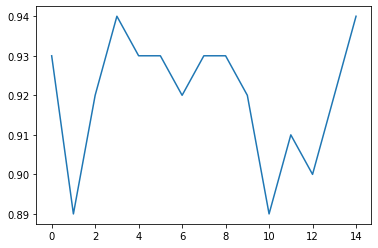

In [13]:
plt.plot(accu)